In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, \
    MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy =', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 2.3060 - accuracy: 0.1232
Accuracy = 0.12319999933242798


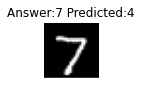

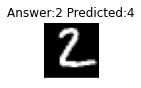

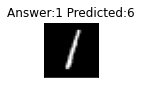

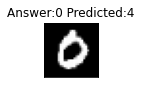

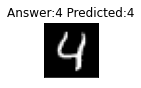

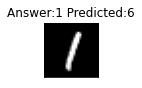

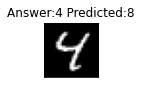

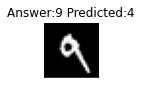

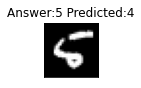

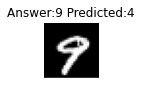

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(1,1))

    score = model.predict(x_test[i].reshape(1, 28, 28, 1))
    predicted = np.argmax(score) 
    answer = np.argmax(y_test[i])
    plt.title('Answer:' + str(answer) + ' Predicted:' + str(predicted))
    
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()